### Contents
* 1. IMPORTING LIBRARIES AND DATASET
* 2. PERFORMING EXPLORATORY DATA ANALYSIS
* 3. FINDING AN OPTIMAL NUMBER OF CLUSTERS USING ELBOW METHOD
    * Applying k-Means
* 4. APPLYING PRINCIPAL COMPONENT ANALYSIS AND VISUALIZE RESULTS
* 5. APPLYING AUTOENCODERS
    * Applying K-Means again after obtaining results from encoders
    * Observations

# 1. IMPORTING LIBRARIES AND DATASET

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import cv2, zipfile, warnings
from IPython.display import display
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
from sklearn.metrics.pairwise import cosine_similarity
import tensorflow as tf
import tensorflow.keras.backend as K
from tensorflow.python.keras import Sequential
from tensorflow.keras import layers, optimizers
from tensorflow.keras.layers import *
from tensorflow.keras import Model
from tensorflow.keras.utils import plot_model
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler
pd.set_option('future.no_silent_downcasting', True)
warnings.filterwarnings('ignore')

In [43]:
sales_df = pd.read_csv("CAA.csv", encoding='unicode_escape')
sales_df

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,10350,20,100.00,15,2244.40,12/2/2004 0:00,Shipped,4,12,2004,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Small
2819,10373,29,100.00,1,3978.51,1/31/2005 0:00,Shipped,1,1,2005,...,Torikatu 38,NaN,Oulu,NaN,90110,Finland,EMEA,Koskitalo,Pirkko,Medium
2820,10386,43,100.00,4,5417.57,3/1/2005 0:00,Resolved,1,3,2005,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Medium
2821,10397,34,62.24,1,2116.16,3/28/2005 0:00,Shipped,1,3,2005,...,1 rue Alsace-Lorraine,NaN,Toulouse,NaN,31000,France,EMEA,Roulet,Annette,Small


In [44]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [45]:
# Converting order date to datetime format
sales_df['ORDERDATE'] = pd.to_datetime(sales_df['ORDERDATE'])
# Checking the type of data of ORDERDATE
sales_df.dtypes

ORDERNUMBER                  int64
QUANTITYORDERED              int64
PRICEEACH                  float64
ORDERLINENUMBER              int64
SALES                      float64
ORDERDATE           datetime64[ns]
STATUS                      object
QTR_ID                       int64
MONTH_ID                     int64
YEAR_ID                      int64
PRODUCTLINE                 object
MSRP                         int64
PRODUCTCODE                 object
CUSTOMERNAME                object
PHONE                       object
ADDRESSLINE1                object
ADDRESSLINE2                object
CITY                        object
STATE                       object
POSTALCODE                  object
COUNTRY                     object
TERRITORY                   object
CONTACTLASTNAME             object
CONTACTFIRSTNAME            object
DEALSIZE                    object
dtype: object

In [46]:
# checking for null values
sales_df.isnull().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

we have `ADDRESSLINE2`, `STATE`, `POSTALCODE` and `TERRITORY` these columns have null values

In [47]:
to_drop  = ['ADDRESSLINE1', 'ADDRESSLINE2', 'POSTALCODE', 'CITY', 'TERRITORY', 'PHONE', 'STATE', 'CONTACTFIRSTNAME', 'CONTACTLASTNAME', 'CUSTOMERNAME', 'ORDERNUMBER']
sales_df = sales_df.drop(to_drop, axis = 1)
sales_df.head()

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,COUNTRY,DEALSIZE
0,30,95.70,2,2871.00,2003-02-24,Shipped,1,2,2003,Motorcycles,95,S10_1678,USA,Small
1,34,81.35,5,2765.90,2003-05-07,Shipped,2,5,2003,Motorcycles,95,S10_1678,France,Small
2,41,94.74,2,3884.34,2003-07-01,Shipped,3,7,2003,Motorcycles,95,S10_1678,France,Medium
3,45,83.26,6,3746.70,2003-08-25,Shipped,3,8,2003,Motorcycles,95,S10_1678,USA,Medium
4,49,100.00,14,5205.27,2003-10-10,Shipped,4,10,2003,Motorcycles,95,S10_1678,USA,Medium


In [48]:
#checking again for null values
sales_df.isnull().sum().sum()

0

# 2: PERFORMING EXPLORATORY DATA ANALYSIS

In [49]:
sales_df.nunique()

QUANTITYORDERED      58
PRICEEACH          1016
ORDERLINENUMBER      18
SALES              2763
ORDERDATE           252
STATUS                6
QTR_ID                4
MONTH_ID             12
YEAR_ID               3
PRODUCTLINE           7
MSRP                 80
PRODUCTCODE         109
COUNTRY              19
DEALSIZE              3
dtype: int64

In [50]:
sales_df.COUNTRY.unique()

array(['USA', 'France', 'Norway', 'Australia', 'Finland', 'Austria', 'UK',
       'Spain', 'Sweden', 'Singapore', 'Canada', 'Japan', 'Italy',
       'Denmark', 'Belgium', 'Philippines', 'Germany', 'Switzerland',
       'Ireland'], dtype=object)

In [51]:
sales_df.COUNTRY.value_counts()

COUNTRY
USA            1004
Spain           342
France          314
Australia       185
UK              144
Italy           113
Finland          92
Norway           85
Singapore        79
Canada           70
Denmark          63
Germany          62
Sweden           57
Austria          55
Japan            52
Belgium          33
Switzerland      31
Philippines      26
Ireland          16
Name: count, dtype: int64

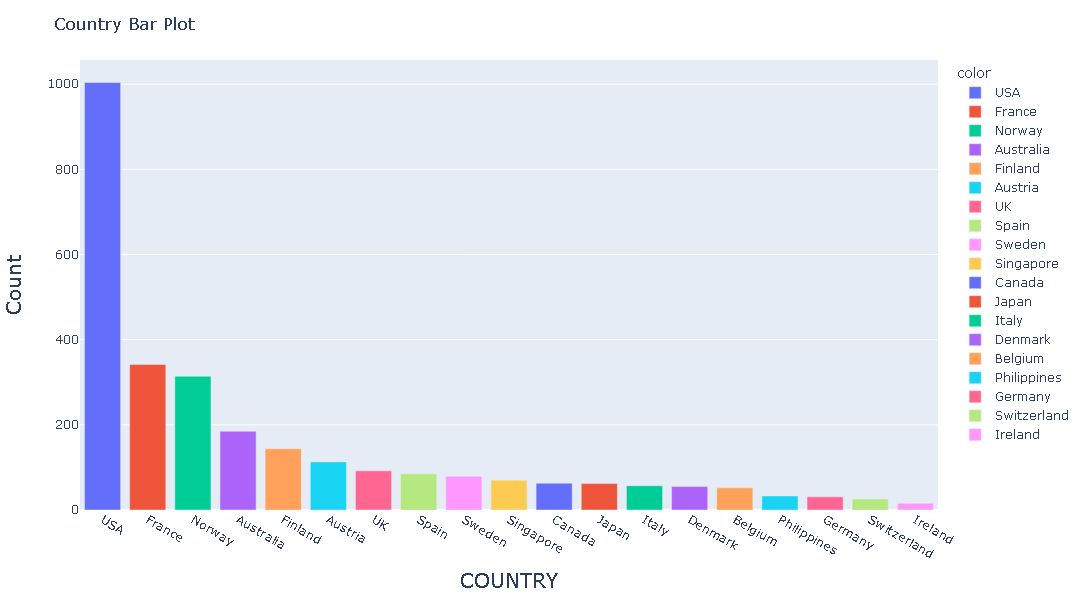

In [52]:
def barplot_visualization(x):
    '''
    Function to visulize the count of items in a given column
    '''
    #fig = plt.figure(figsize=(12,6))
    fig = px.bar(x=sales_df[x].unique(), y=sales_df[x].value_counts(), height=600, color=sales_df[x].unique(),
                 labels={x:x}
                )
    fig.update_layout(yaxis=dict(title_text='Count', titlefont=dict(size=20)), 
                      xaxis=dict(title_text=x, titlefont=dict(size=20)),
                      title_text=x[0]+ x[1:].lower() +' Bar Plot'
                     )
    fig.show()
g = barplot_visualization('COUNTRY')

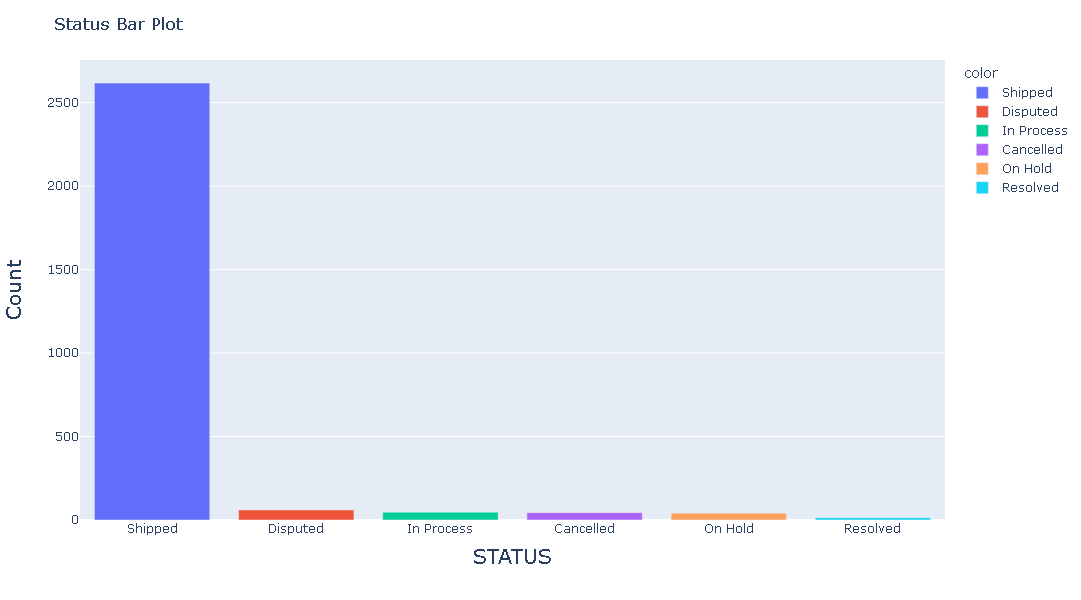

In [53]:
barplot_visualization('STATUS')

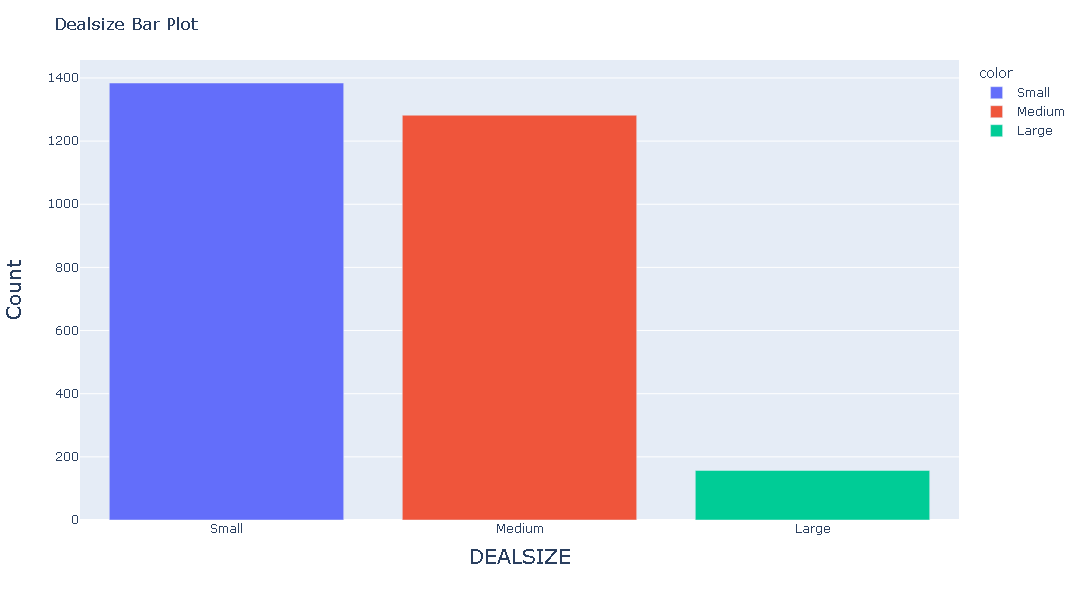

In [54]:
barplot_visualization('DEALSIZE')

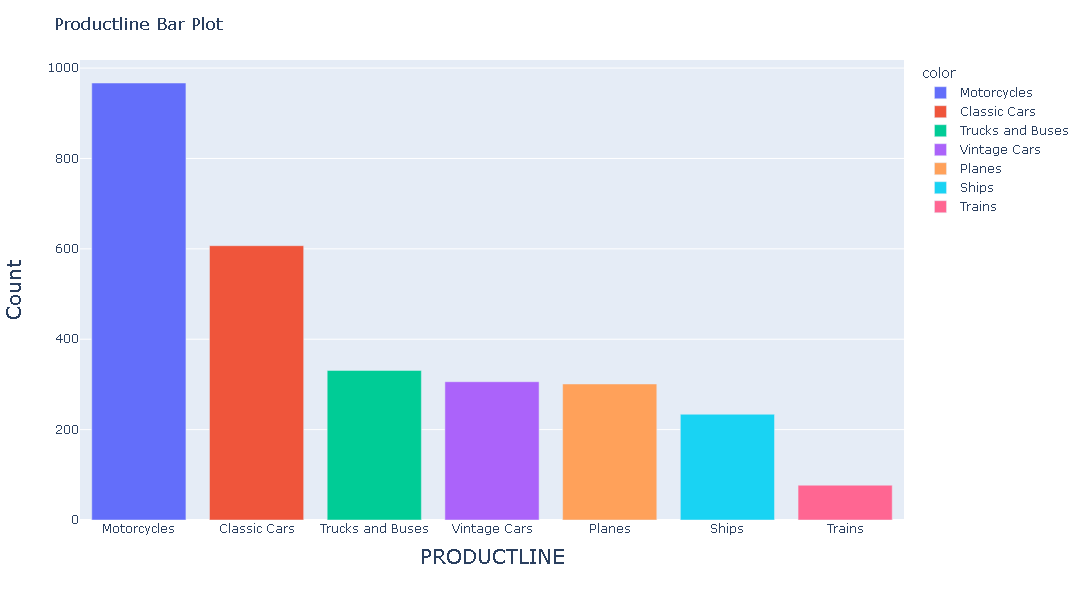

In [55]:
barplot_visualization('PRODUCTLINE')

### Encoding Categorical Variables

In [56]:
status_dict = {'Shipped':1, 'Cancelled':2, 'On Hold':2, 'Disputed':2, 'In Process':0, 'Resolved':0}
sales_df['STATUS'] = sales_df['STATUS'].replace(status_dict)

In [57]:
sales_df = pd.get_dummies(data=sales_df, columns=['PRODUCTLINE', 'DEALSIZE', 'COUNTRY'])
sales_df.shape

(2823, 40)

In [58]:
sales_df.head()

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,MSRP,...,COUNTRY_Italy,COUNTRY_Japan,COUNTRY_Norway,COUNTRY_Philippines,COUNTRY_Singapore,COUNTRY_Spain,COUNTRY_Sweden,COUNTRY_Switzerland,COUNTRY_UK,COUNTRY_USA
0,30,95.70,2,2871.00,2003-02-24,1,1,2,2003,95,...,False,False,False,False,False,False,False,False,False,True
1,34,81.35,5,2765.90,2003-05-07,1,2,5,2003,95,...,False,False,False,False,False,False,False,False,False,False
2,41,94.74,2,3884.34,2003-07-01,1,3,7,2003,95,...,False,False,False,False,False,False,False,False,False,False
3,45,83.26,6,3746.70,2003-08-25,1,3,8,2003,95,...,False,False,False,False,False,False,False,False,False,True
4,49,100.00,14,5205.27,2003-10-10,1,4,10,2003,95,...,False,False,False,False,False,False,False,False,False,True


In [59]:
pd.Categorical(sales_df['PRODUCTCODE'])

['S10_1678', 'S10_1678', 'S10_1678', 'S10_1678', 'S10_1678', ..., 'S72_3212', 'S72_3212', 'S72_3212', 'S72_3212', 'S72_3212']
Length: 2823
Categories (109, object): ['S10_1678', 'S10_1949', 'S10_2016', 'S10_4698', ..., 'S700_3962', 'S700_4002', 'S72_1253', 'S72_3212']

In [60]:
pd.Categorical(sales_df['PRODUCTCODE']).codes

array([  0,   0,   0, ..., 108, 108, 108], dtype=int8)

In [61]:
# Since the number unique product code is 109, if we add one-hot variables, there 
# would be additional 109 columns, that can be avoided by using categorical encoding
sales_df['PRODUCTCODE'] = pd.Categorical(sales_df['PRODUCTCODE']).codes

In [62]:
date_group = sales_df.groupby('ORDERDATE').sum()
date_group

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,STATUS,QTR_ID,MONTH_ID,YEAR_ID,MSRP,PRODUCTCODE,...,COUNTRY_Italy,COUNTRY_Japan,COUNTRY_Norway,COUNTRY_Philippines,COUNTRY_Singapore,COUNTRY_Spain,COUNTRY_Sweden,COUNTRY_Switzerland,COUNTRY_UK,COUNTRY_USA
ORDERDATE,,,,,,,,,,,,,,,,,,,,,
2003-01-06,151,288.78,10,12133.25,4,4,4,8012,363,174,...,0,0,0,0,0,0,0,0,0,4
2003-01-09,142,284.96,10,11432.34,4,4,4,8012,372,181,...,0,0,0,0,0,0,0,0,0,0
2003-01-10,80,150.14,3,6864.05,2,2,2,4006,155,37,...,0,0,0,0,0,0,0,0,0,2
2003-01-29,541,1417.54,136,54702.00,16,16,16,32048,1695,723,...,0,0,16,0,0,0,0,0,0,0
2003-01-31,443,1061.89,91,44621.96,13,13,13,26039,1365,720,...,0,0,0,0,0,13,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2005-05-13,259,561.18,21,31821.90,12,12,30,12030,728,101,...,0,0,0,0,0,6,0,0,0,0
2005-05-17,509,1269.43,105,59475.10,14,28,70,28070,1669,462,...,0,0,0,0,0,0,0,0,0,0
2005-05-29,607,1148.40,94,51233.18,0,30,75,30075,1328,797,...,0,0,0,0,0,0,0,0,0,2


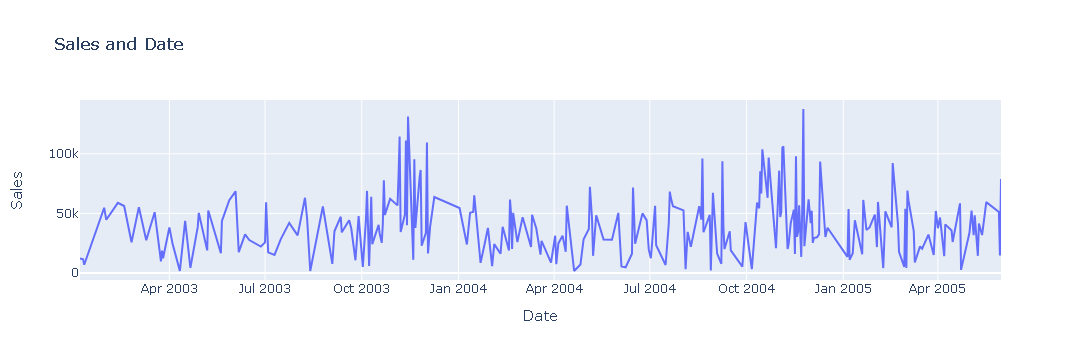

In [63]:
fig = px.line(x = date_group.index, y = date_group.SALES, title = 'Sales and Date')
fig.update_layout(yaxis=dict(title_text='Sales', titlefont=dict(size=15)), 
                  xaxis=dict(title_text='Date', titlefont=dict(size=15))
                 )
fig.show()

In [64]:
sales_df.drop("ORDERDATE", axis = 1, inplace = True)
sales_df.shape

(2823, 39)

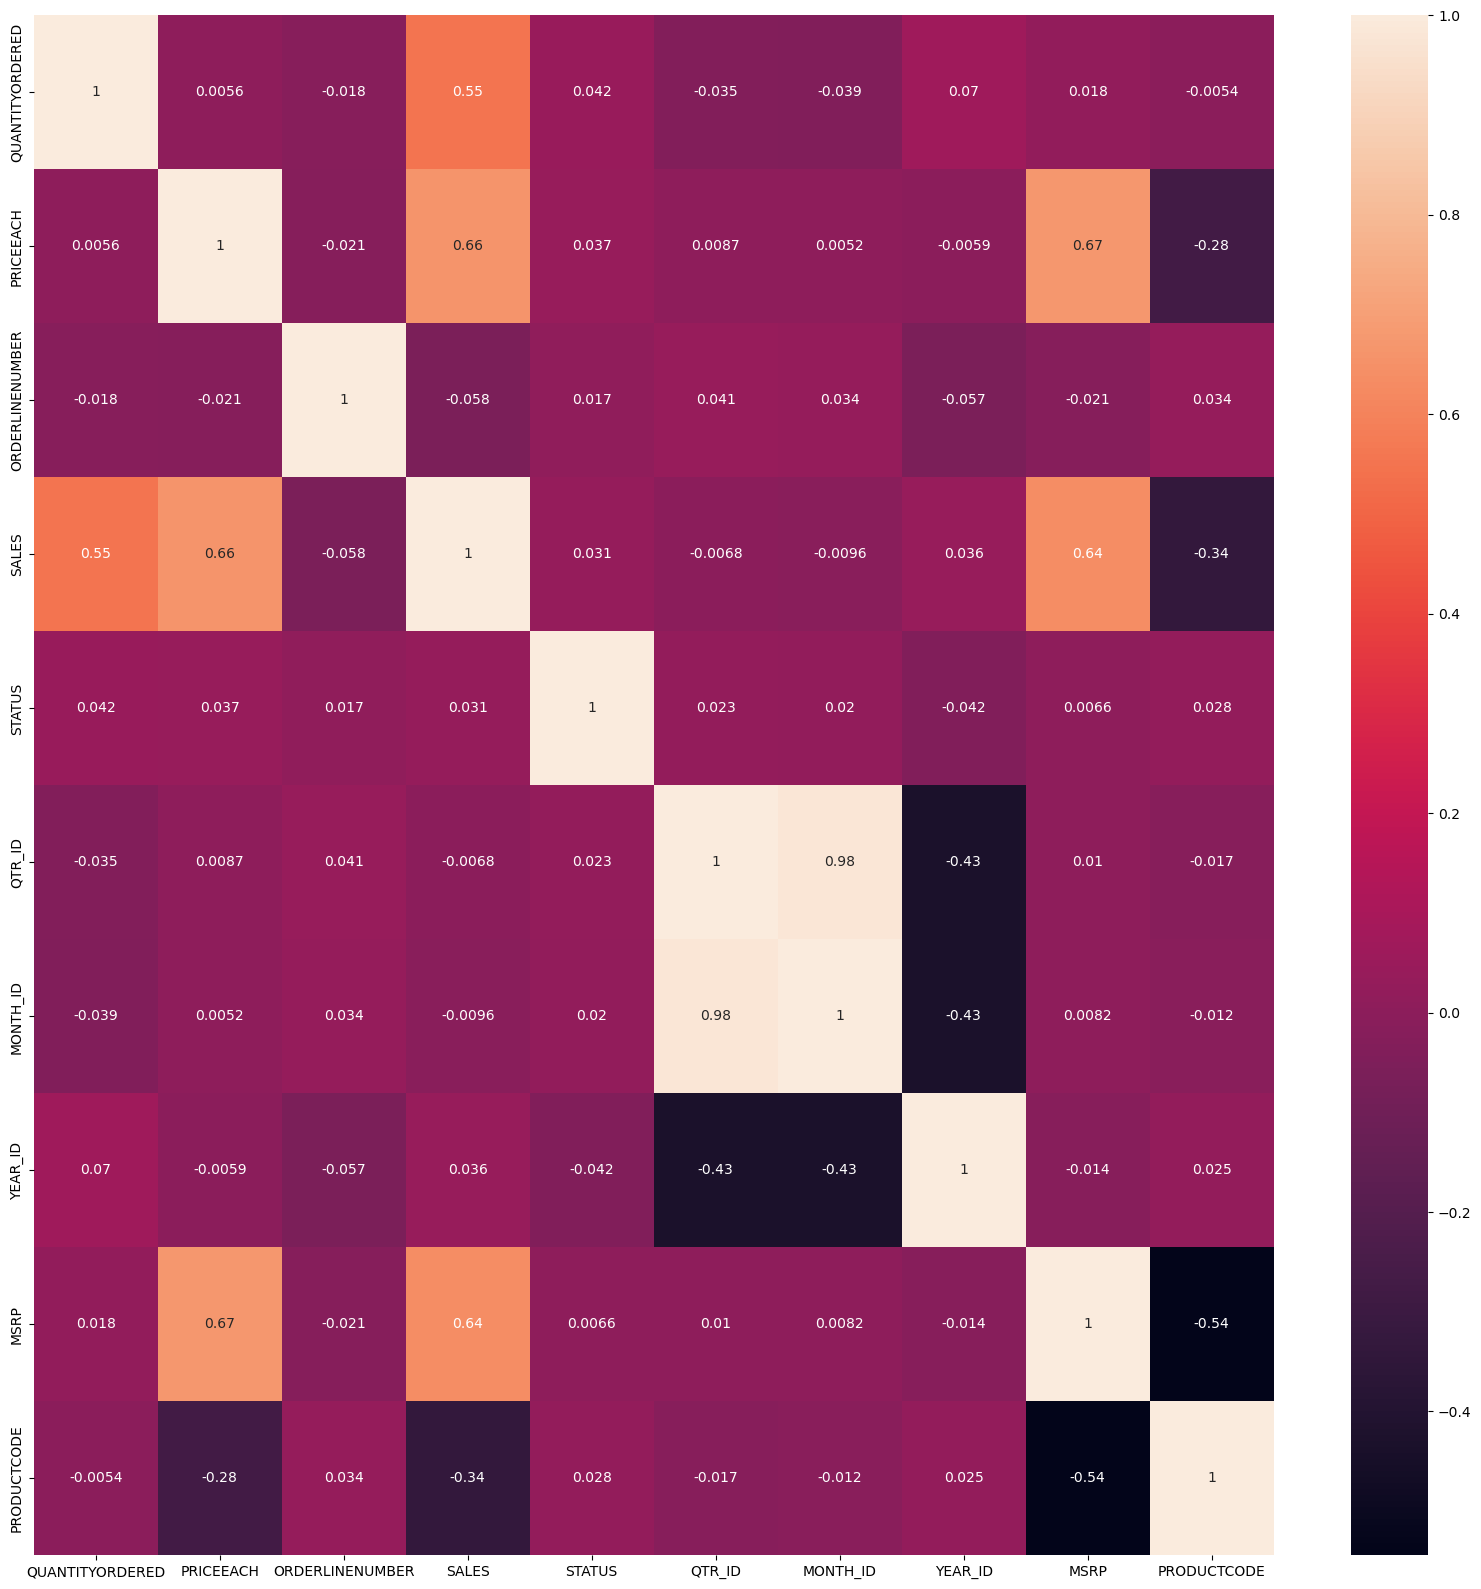

In [65]:
plt.figure(figsize = (20, 20))
corr_matrix = sales_df.iloc[:, :10].corr()
sns.heatmap(corr_matrix, annot=True);

**OBSERVATIONS**
- There is a high correlation in Quarter ID and monthly ID
- MSRP is very correlated to PRICEEACH and SALES
- PRODUCTCODE is little correlated with MSRP, PRICEEACH and SALES
- Strong correlation btw SALES, PRICEEACH, QUANTITYORDERED

In [66]:
# Quarter ID and monthly ID are highly correlated
sales_df.drop("QTR_ID", axis = 1, inplace = True)
sales_df.shape

(2823, 38)

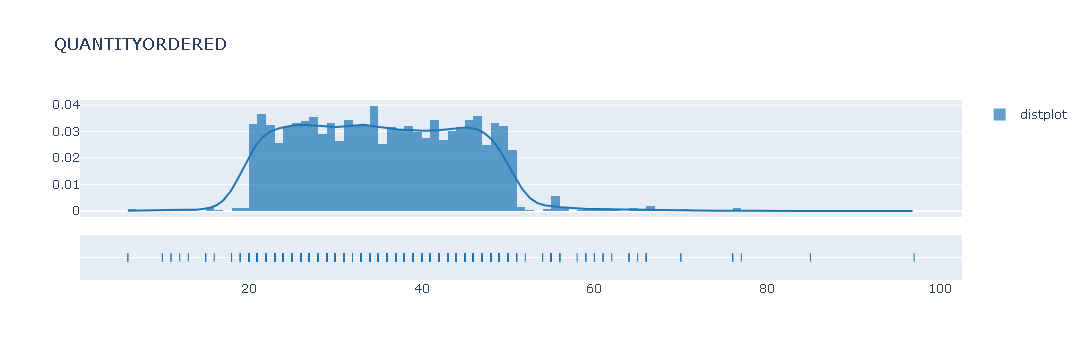

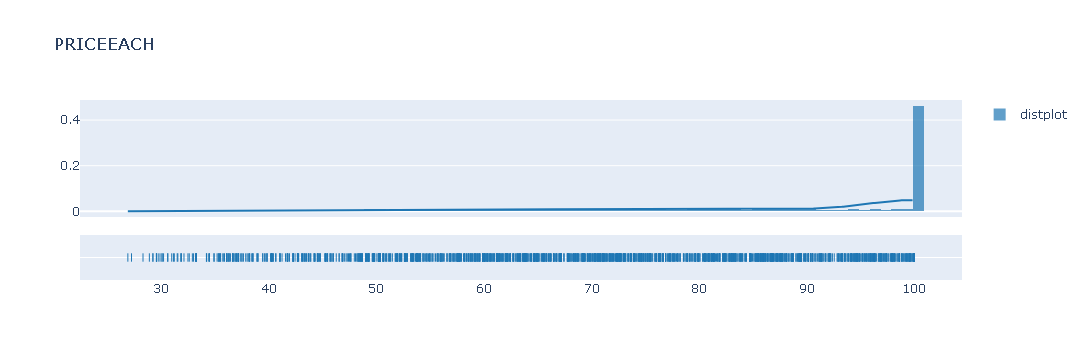

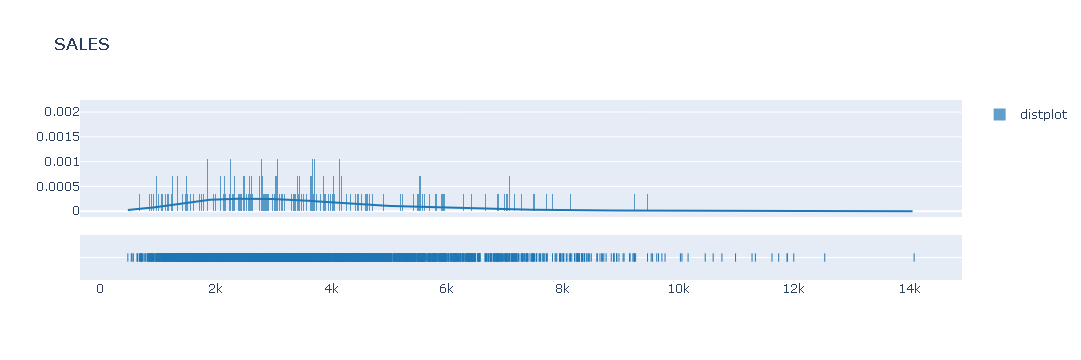

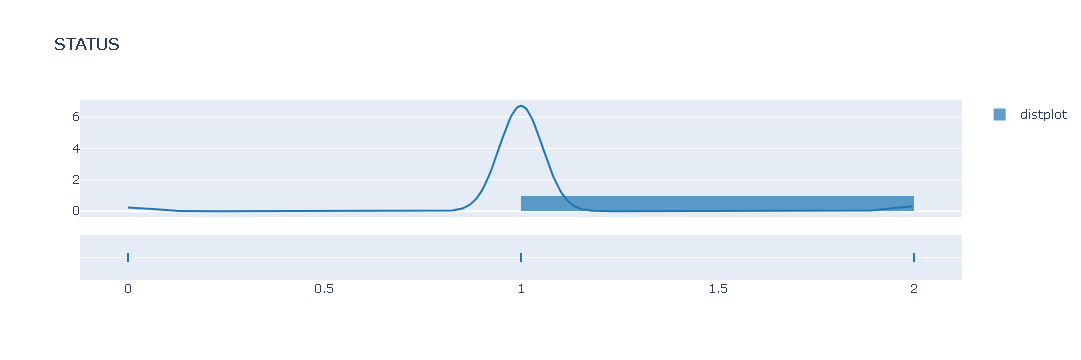

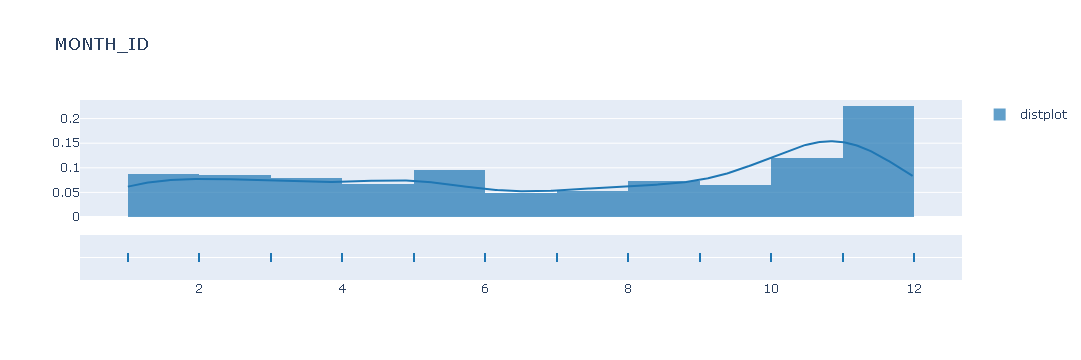

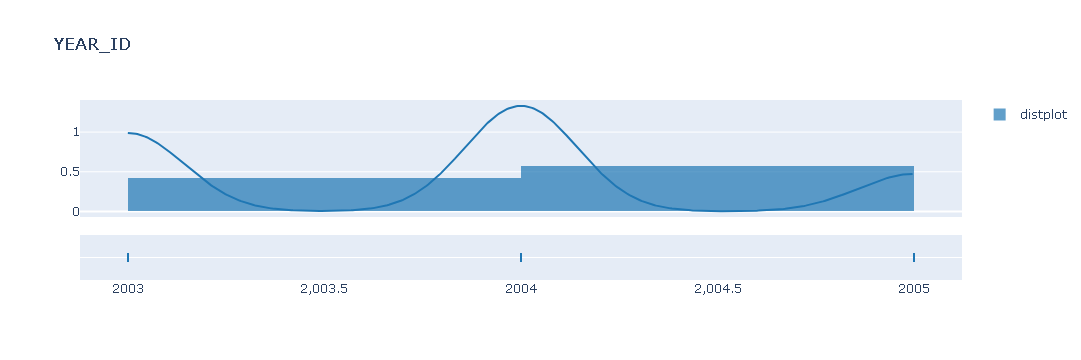

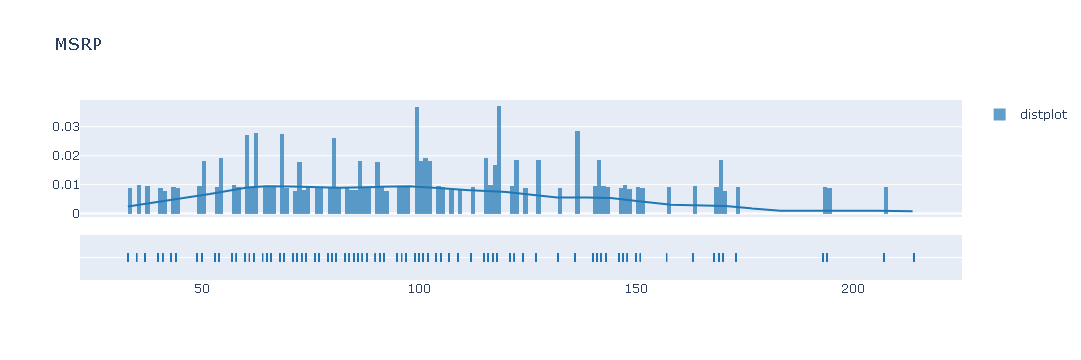

In [67]:
import plotly.figure_factory as ff
#fig = plt.figure(figsize=(10,10));
for i in range(8):
    if sales_df.columns[i]!='ORDERLINENUMBER':
        fig = ff.create_distplot([sales_df[sales_df.columns[i]].apply(lambda x: float(x))], ['distplot']);
        fig.update_layout(title_text=sales_df.columns[i]);
        fig.show();

In [ ]:
# Visualizing relationship between variables using pairplots
fig = px.scatter_matrix(sales_df, 
                        dimensions=sales_df.columns[:8], color='MONTH_ID')# fill color by months
fig.update_layout(title_text='Sales Data',
                  width=1100,
                  height=1100
                 )
fig.show()

**OBSERVATIONS**
* A trend exists between 'SALES' and 'QUANTITYORDERED'  
*  A trend exists between 'MSRP' and 'PRICEEACH'
* A trend exists between 'PRICEEACH' and 'SALES'

# 3: FINDING AN OPTIMAL NUMBER OF CLUSTERS USING ELBOW METHOD

In [253]:
# Scaling data
scaler = StandardScaler()
sales_df_scaled = scaler.fit_transform(sales_df)

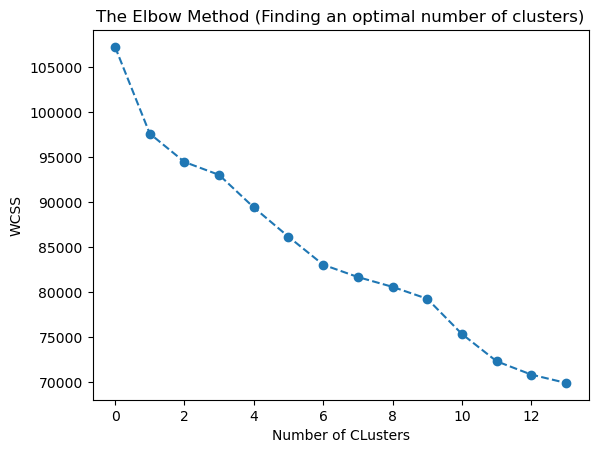

In [254]:
wcss = []
for i in range(1,15):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(sales_df_scaled)
    wcss.append(kmeans.inertia_)
plt.plot(wcss, marker='o', linestyle='--')
plt.title('The Elbow Method (Finding an optimal number of clusters)')
plt.xlabel('Number of CLusters')
plt.ylabel('WCSS')
plt.show()

 From this, 5th cluster is forming the elbow of the curve. After that we apply autoencoders.

In [255]:
#applying k-means with 5 clusters
kmeans = KMeans(n_clusters=5, init='k-means++')
kmeans.fit(sales_df_scaled)
labels = kmeans.labels_
labels

array([2, 2, 0, ..., 0, 2, 0])

In [256]:
kmeans.cluster_centers_.shape

(5, 38)

In [257]:
cluster_centers = pd.DataFrame(data=kmeans.cluster_centers_, columns=sales_df.columns)
cluster_centers

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,STATUS,MONTH_ID,YEAR_ID,MSRP,PRODUCTCODE,PRODUCTLINE_Classic Cars,...,COUNTRY_Italy,COUNTRY_Japan,COUNTRY_Norway,COUNTRY_Philippines,COUNTRY_Singapore,COUNTRY_Spain,COUNTRY_Sweden,COUNTRY_Switzerland,COUNTRY_UK,COUNTRY_USA
0,0.292037,0.579422,-0.020571,0.454903,0.005502,0.001629,0.001370,0.380976,-0.165941,0.101293,...,-0.034282,-0.018764,0.000996,0.014530,-0.169676,0.009196,0.017908,0.054434,0.005561,0.042991
1,-0.008141,0.017377,0.087967,0.048233,-0.039370,0.007978,-0.373151,0.145642,-0.157141,0.160940,...,-0.204199,-0.136988,-0.176195,-0.096414,5.893571,-0.371278,-0.143553,-0.105371,-0.231843,-0.742934
2,-0.480161,-0.715373,0.039887,-0.810249,-0.020831,0.008474,0.004419,-0.568011,0.263781,-0.148875,...,0.046827,0.024279,0.009265,-0.000374,-0.169676,0.004457,-0.001241,-0.033344,0.022136,-0.014677
3,1.248711,0.799961,-0.266574,2.573251,0.105914,-0.084284,0.142867,1.438681,-0.879880,0.572816,...,0.029197,0.008833,0.015039,-0.027994,-0.130047,-0.030759,-0.050616,-0.105371,-0.113017,0.130874
4,-0.006827,-0.412688,0.179289,-0.351512,0.058123,-0.000096,-0.017810,-0.698940,0.647164,-0.721812,...,-0.002829,0.058719,-0.022202,-0.096414,0.149442,0.193267,-0.050005,-0.105371,0.007372,-0.055780


In [258]:
# In order to understand what these numbers mean, we perform inverse transformation
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data=cluster_centers, columns=sales_df.columns)
cluster_centers

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,STATUS,MONTH_ID,YEAR_ID,MSRP,PRODUCTCODE,PRODUCTLINE_Classic Cars,...,COUNTRY_Italy,COUNTRY_Japan,COUNTRY_Norway,COUNTRY_Philippines,COUNTRY_Singapore,COUNTRY_Spain,COUNTRY_Sweden,COUNTRY_Switzerland,COUNTRY_UK,COUNTRY_USA
0,37.937169,95.345897,6.379258,4391.611204,1.012112,7.098410,2003.816048,116.023467,48.532930,3.906132e-01,...,3.330810e-02,1.589705e-02,3.028009e-02,1.059803e-02,5.551115e-17,1.241484e-01,2.271007e-02,1.665405e-02,5.223316e-02,3.762301e-01
1,35.013514,84.009054,6.837838,3642.712162,1.000000,7.121622,2003.554054,106.567568,48.810811,4.189189e-01,...,-6.938894e-18,3.469447e-18,-6.938894e-18,-1.734723e-18,1.000000e+00,-2.775558e-17,-3.469447e-18,-5.204170e-18,1.387779e-17,-5.551115e-17
2,30.416180,69.228966,6.634696,2061.783369,1.005004,7.123436,2003.818182,77.892410,62.103420,2.718932e-01,...,4.920767e-02,2.168474e-02,3.169308e-02,9.174312e-03,2.428613e-17,1.226022e-01,2.001668e-02,7.506255e-03,5.587990e-02,3.486239e-01
3,47.254902,99.794314,5.339869,8292.630850,1.039216,6.784314,2003.915033,158.522876,25.986928,6.143791e-01,...,4.575163e-02,1.960784e-02,3.267974e-02,6.535948e-03,6.535948e-03,1.111111e-01,1.307190e-02,-5.204170e-18,2.614379e-02,4.183007e-01
4,35.026316,75.334342,7.223684,2906.565395,1.026316,7.092105,2003.802632,72.631579,74.210526,-1.110223e-16,...,3.947368e-02,2.631579e-02,2.631579e-02,0.000000e+00,5.263158e-02,1.842105e-01,1.315789e-02,-1.734723e-18,5.263158e-02,3.289474e-01


In [259]:
sales_df['ORDERLINENUMBER'] = sales_df['ORDERLINENUMBER'].apply(lambda x: float(x))

In [260]:
# Adding a label (which cluster) corresponding to each data point
sales_df_cluster = pd.concat([sales_df, pd.DataFrame({'cluster':labels})], axis = 1)
sales_df_cluster

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,STATUS,MONTH_ID,YEAR_ID,MSRP,PRODUCTCODE,PRODUCTLINE_Classic Cars,...,COUNTRY_Japan,COUNTRY_Norway,COUNTRY_Philippines,COUNTRY_Singapore,COUNTRY_Spain,COUNTRY_Sweden,COUNTRY_Switzerland,COUNTRY_UK,COUNTRY_USA,cluster
0,30,95.70,2.0,2871.00,1,2,2003,95,0,False,...,False,False,False,False,False,False,False,False,True,2
1,34,81.35,5.0,2765.90,1,5,2003,95,0,False,...,False,False,False,False,False,False,False,False,False,2
2,41,94.74,2.0,3884.34,1,7,2003,95,0,False,...,False,False,False,False,False,False,False,False,False,0
3,45,83.26,6.0,3746.70,1,8,2003,95,0,False,...,False,False,False,False,False,False,False,False,True,0
4,49,100.00,14.0,5205.27,1,10,2003,95,0,False,...,False,False,False,False,False,False,False,False,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,20,100.00,15.0,2244.40,1,12,2004,54,108,False,...,False,False,False,False,True,False,False,False,False,2
2819,29,100.00,1.0,3978.51,1,1,2005,54,108,False,...,False,False,False,False,False,False,False,False,False,0
2820,43,100.00,4.0,5417.57,0,3,2005,54,108,False,...,False,False,False,False,True,False,False,False,False,0
2821,34,62.24,1.0,2116.16,1,3,2005,54,108,False,...,False,False,False,False,False,False,False,False,False,2


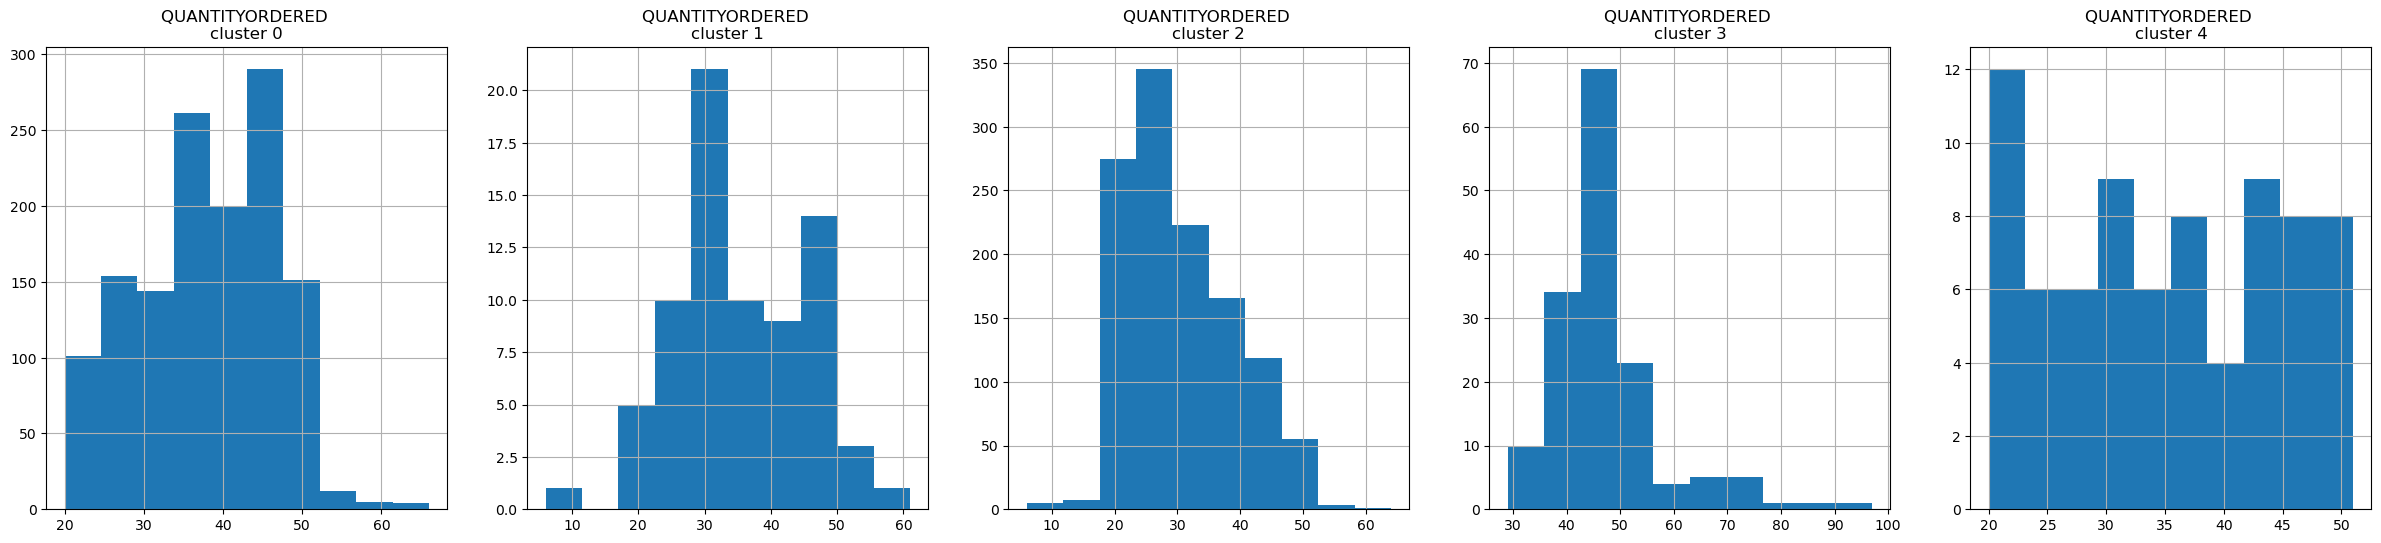

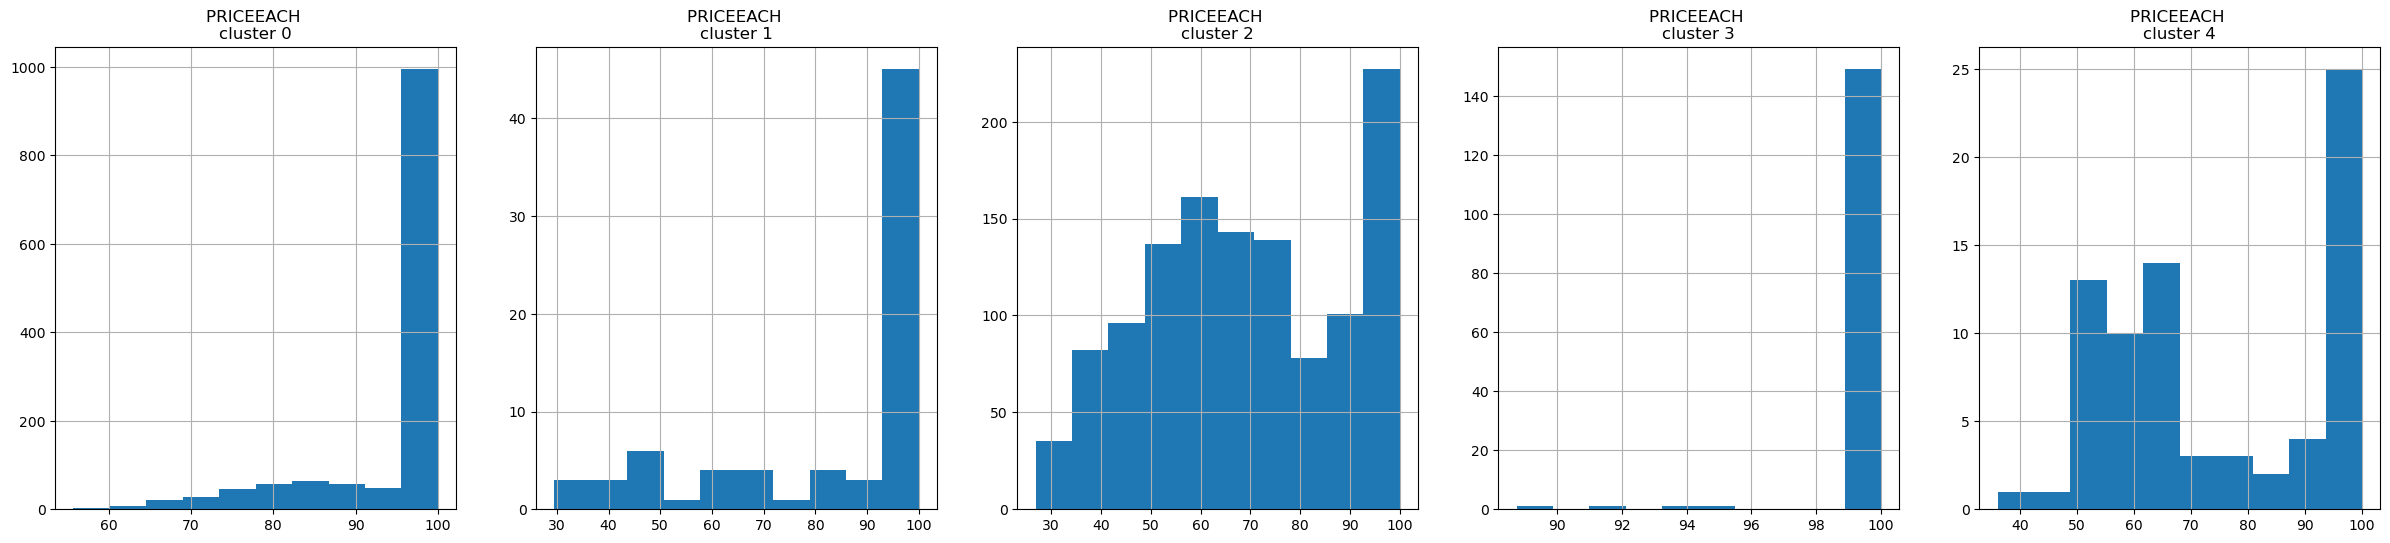

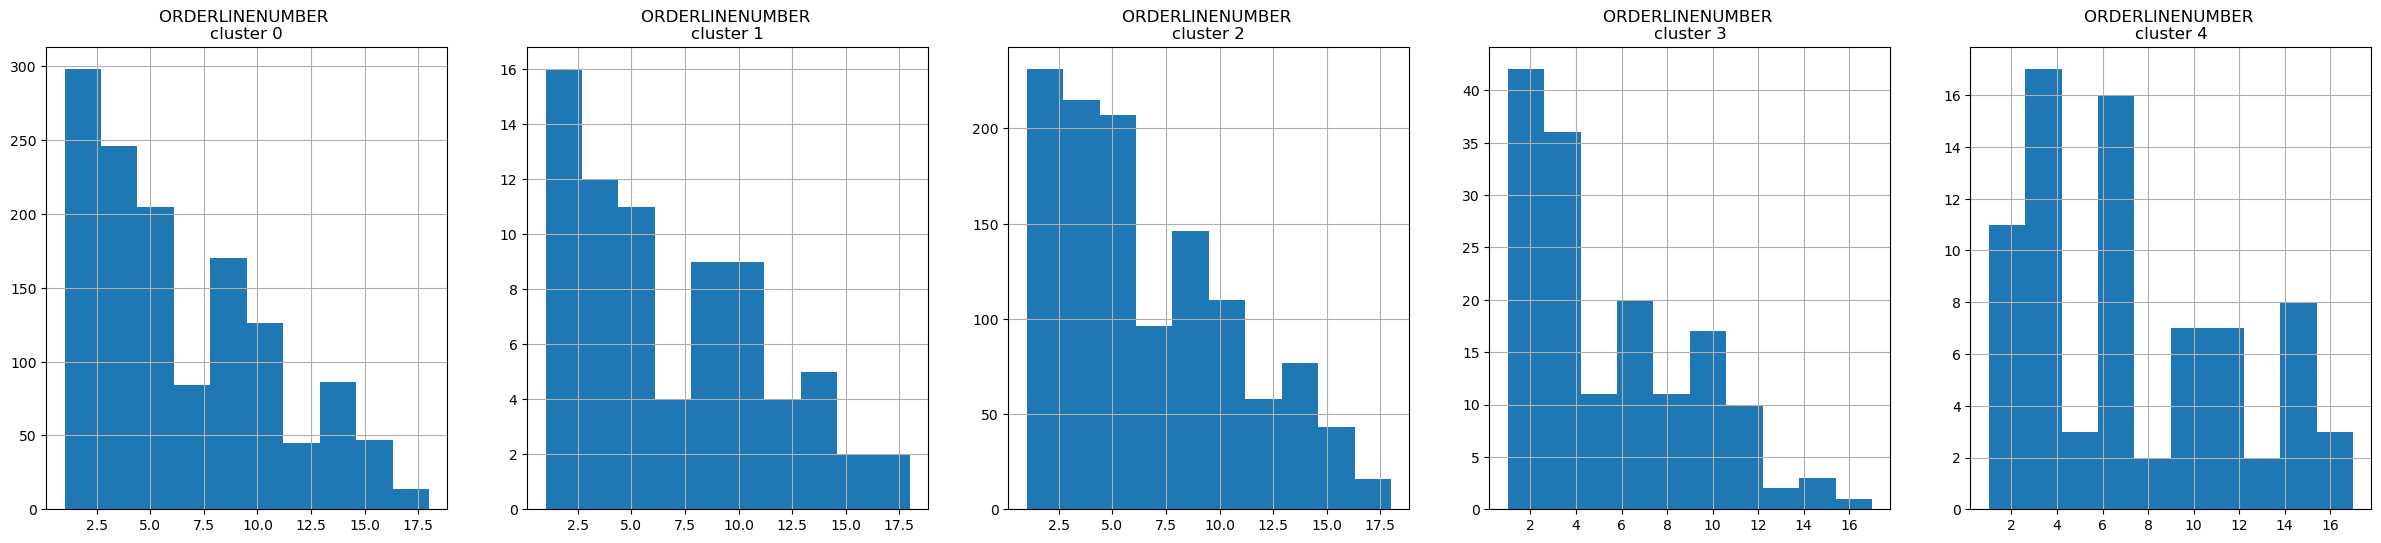

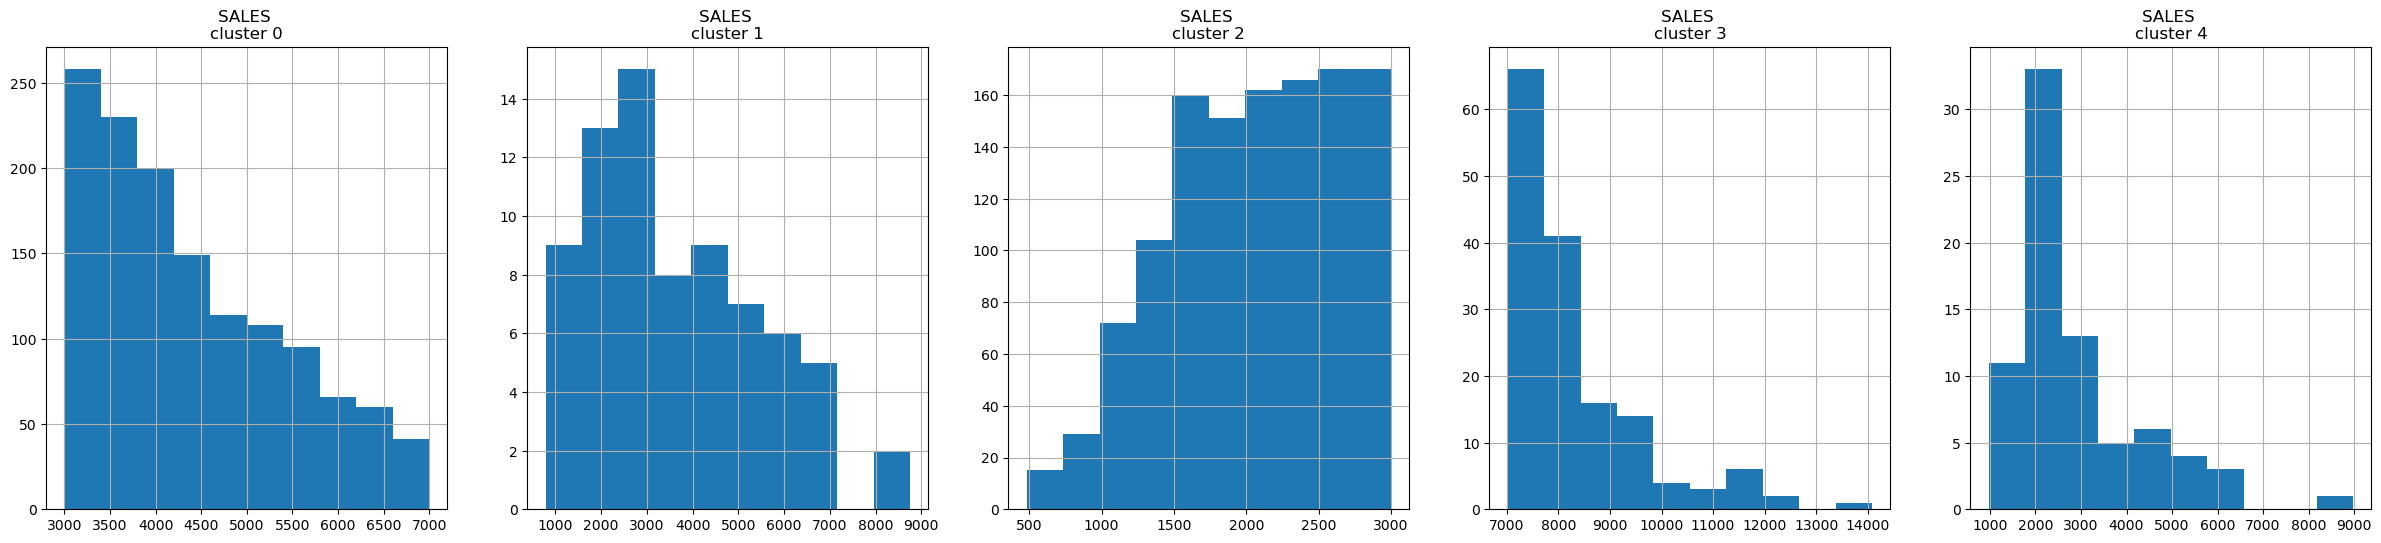

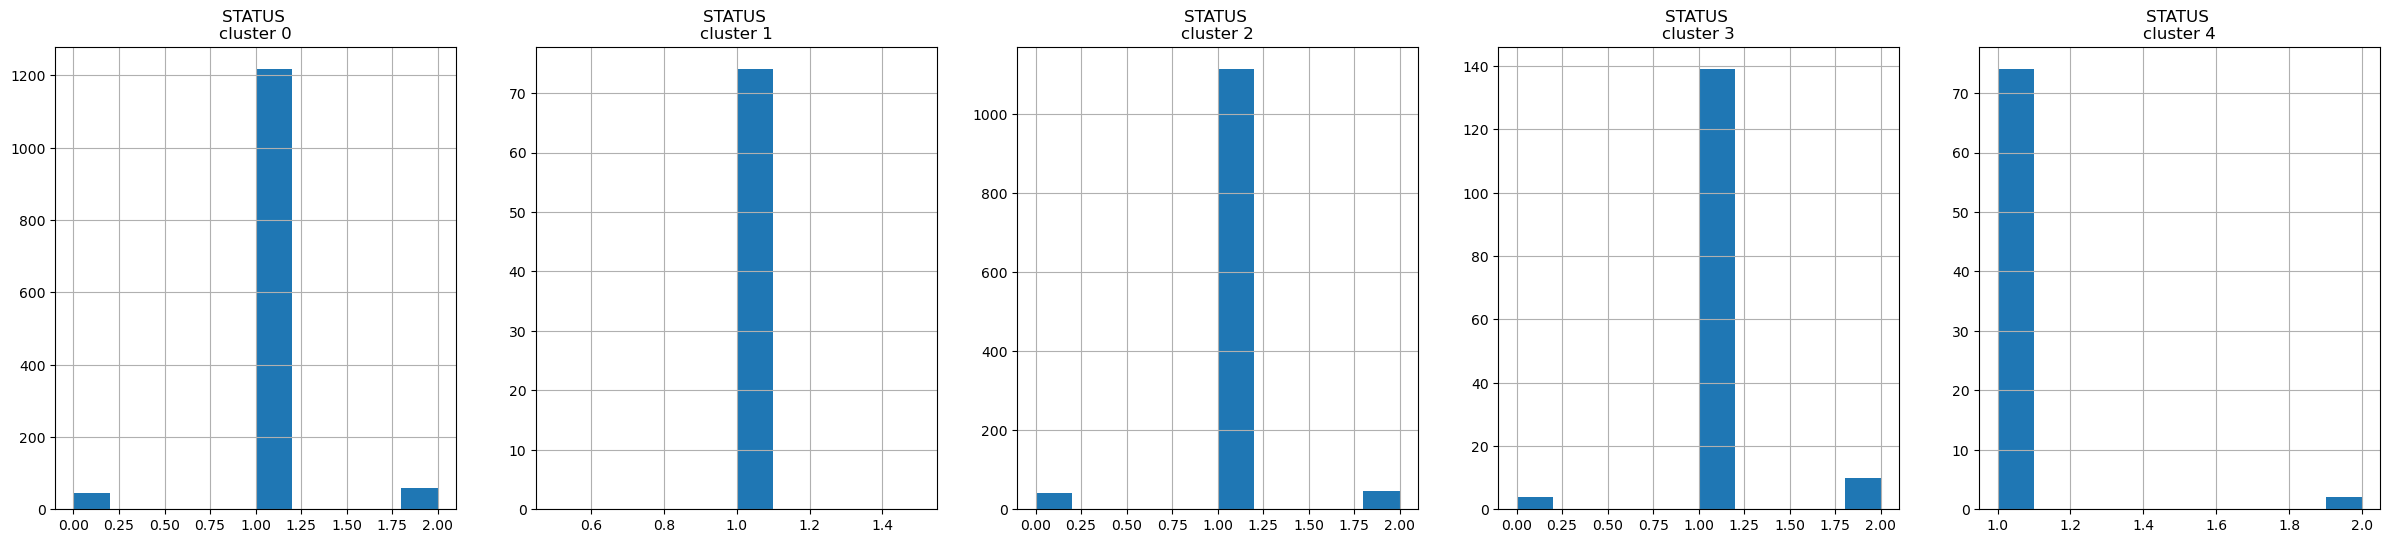

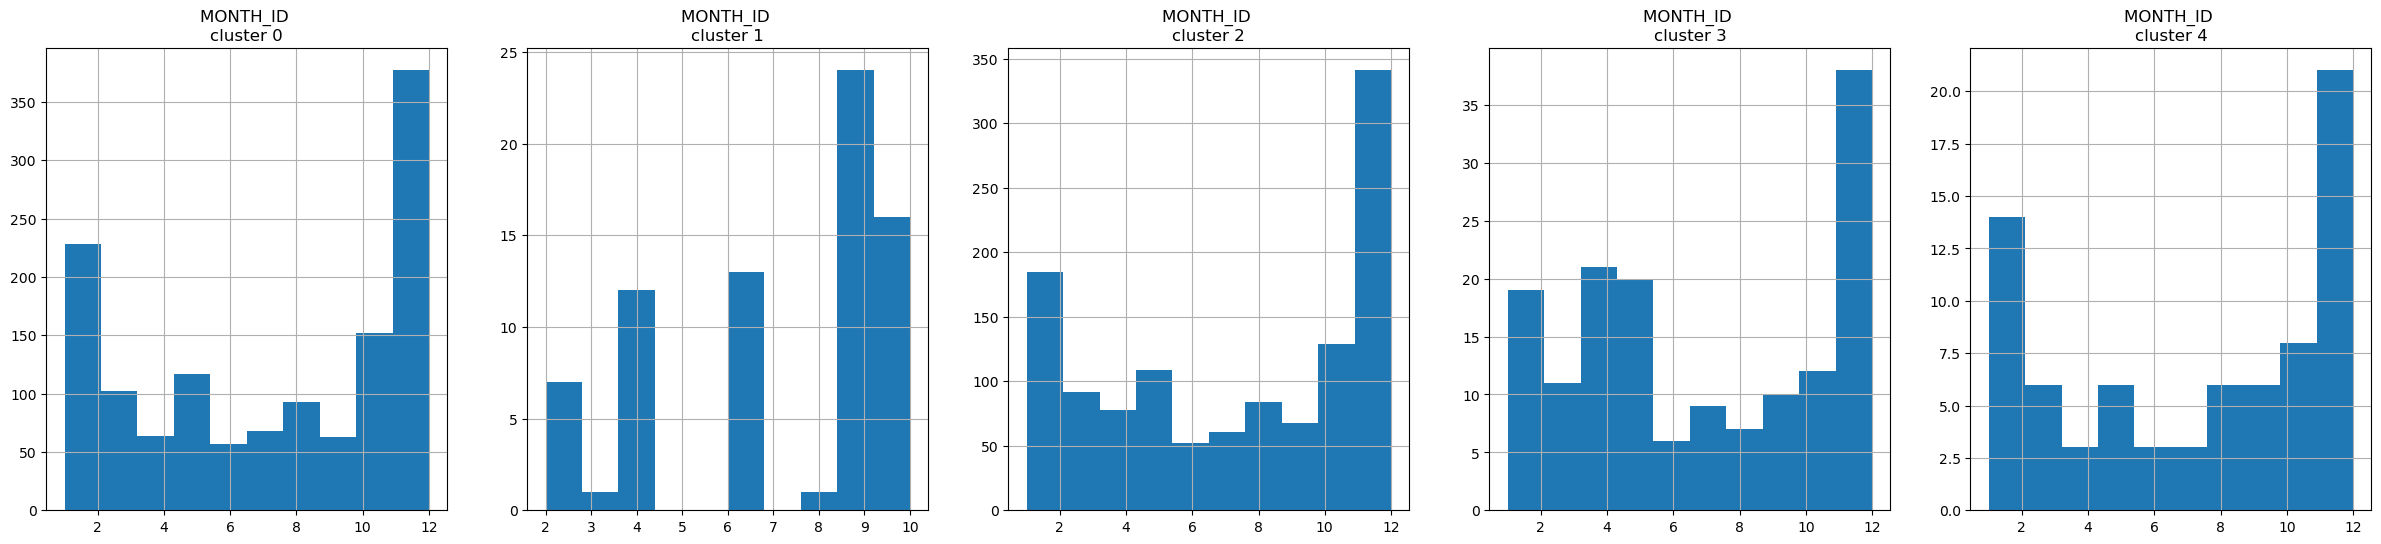

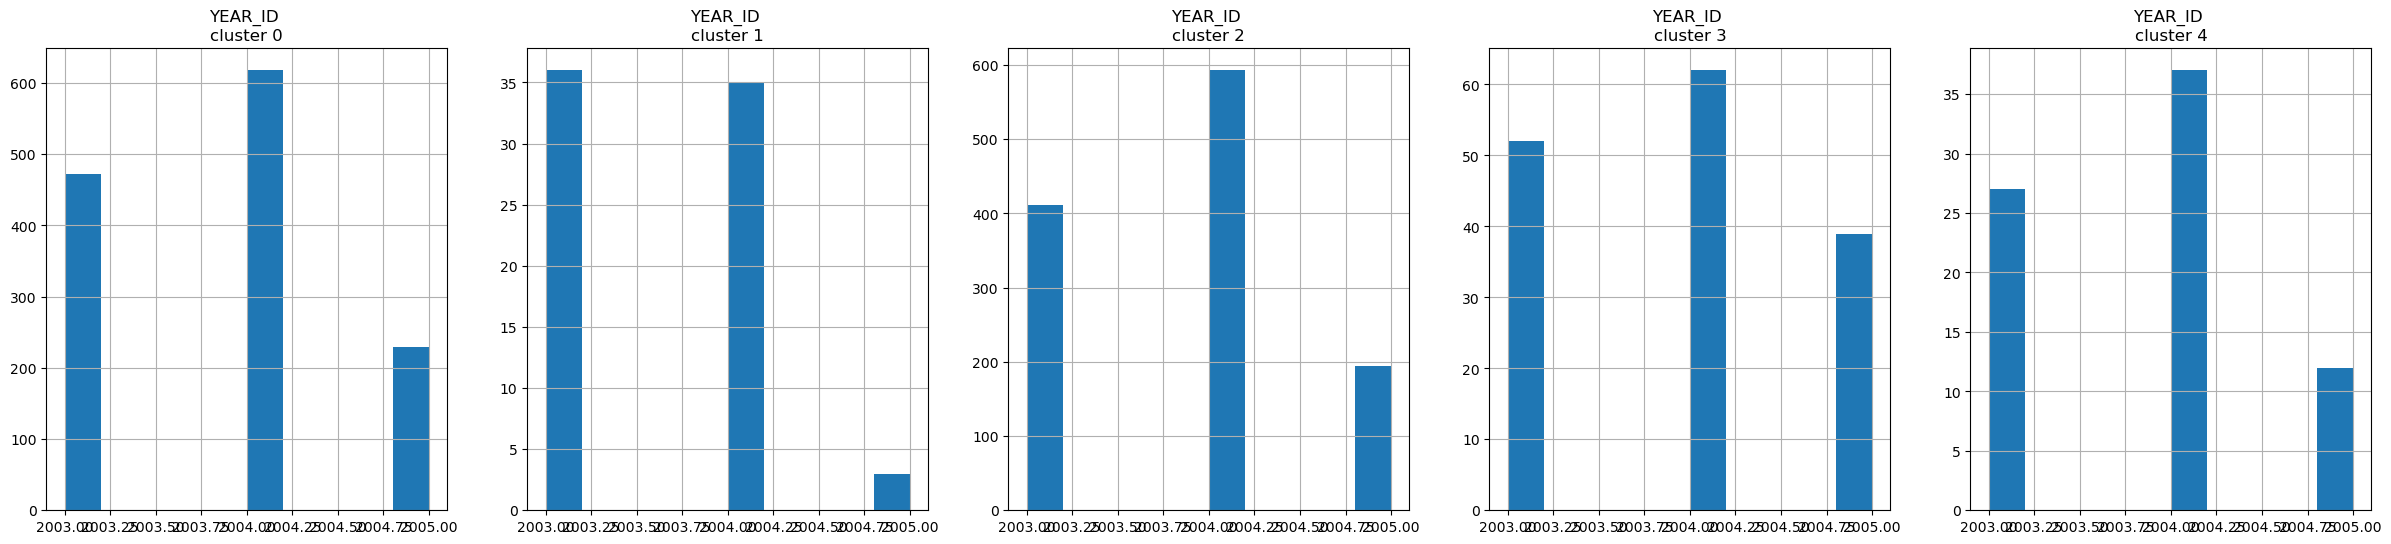

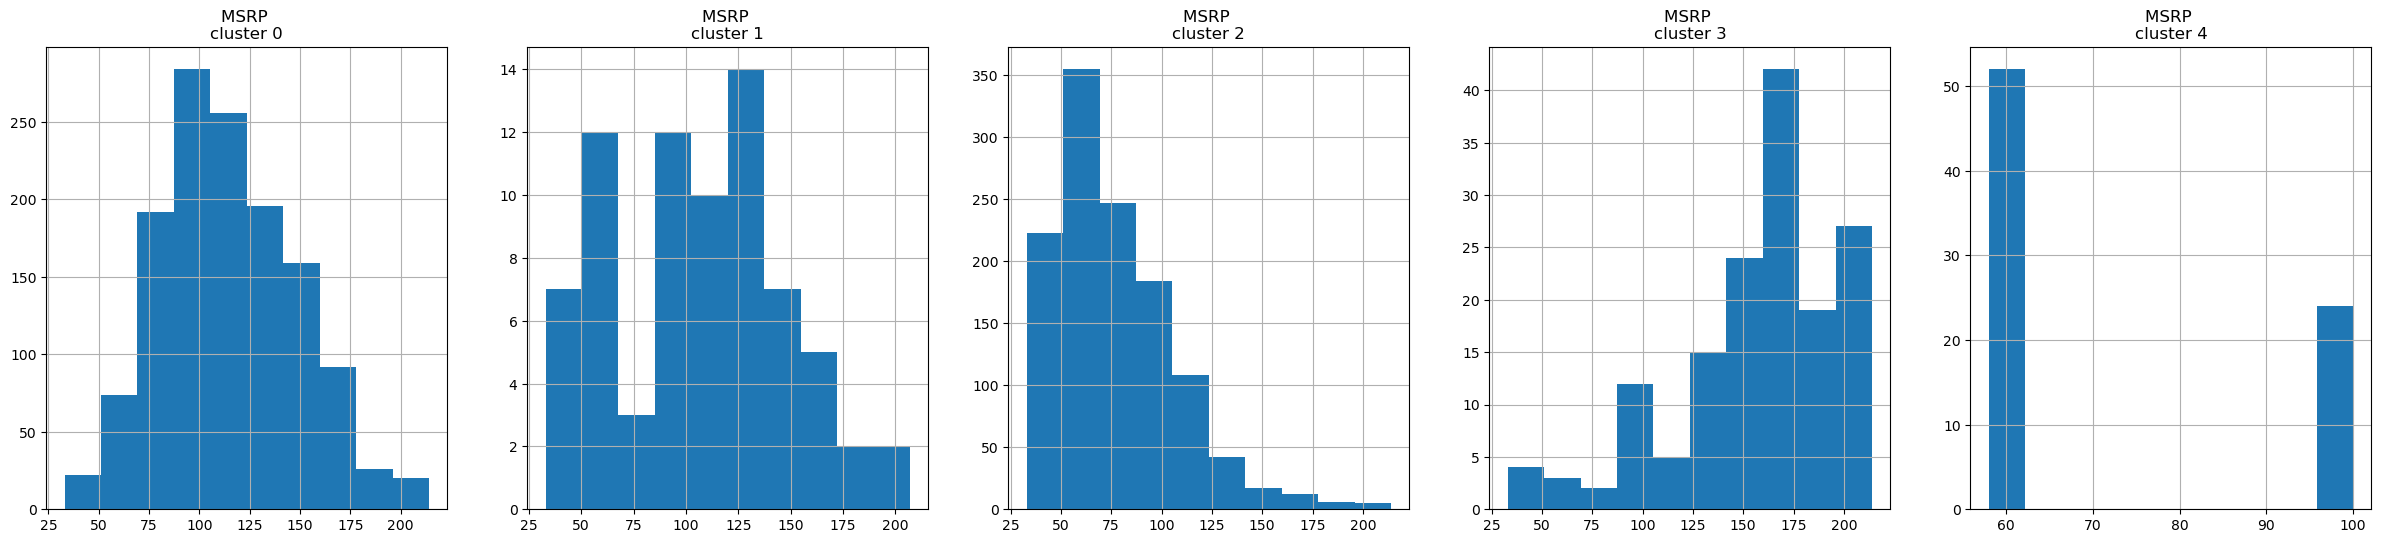

In [261]:
# ploting histogram based on cluster 
for i in sales_df.columns[:8]:
    plt.figure(figsize=(30,6))
    for j in range(5):
        plt.subplot(1,5,j+1)
        cluster = sales_df_cluster[sales_df_cluster['cluster']==j]
        cluster[i].hist()
        plt.title('{} \ncluster {}'.format(i,j))
plt.show()

**OBSERVATIONS:**
* CLUSTER 0 (highest) - customer in this group buy item in high quantity, price of each item ~ 99, they also corresponds to highest total sales of ~ 8293 and they are most buyers of products with high MSRP ~158.
* CLUSTER 1 - This cluster is nearly close to cluster 4 with MSRP around 94 and average quantity ordered ~34, average piced ~ 83 and sales to 3169.
* CLUSTER 2 (lowest) - This group represents customers who buy items in varying quantity ~30, they tend to low price items ~68, their sales is ~ 2061 and they buy products with lowest MSRP of ~62.
* CLUSTER 3 - This is the second highest cluster, this group buy in medium quantity ~38, with total sales up to ~ 4405 with average price of ~ 95 and MSRP around 115.
* CLUSTER 4 - This group represents customers who are only buying during holidays, they buy in lower quantity ~35, but they tend to buy average price items around ~87, they also correspond to lower total sales around ~3797 and they tend to buy items with MSRP around 116.

# 4: APPLYING PRINCIPAL COMPONENT ANALYSIS AND VISUALIZE RESULTS

In [262]:
pca = PCA(n_components=3)
principal_comp = pca.fit_transform(sales_df_scaled)
principal_comp

array([[-0.48654697, -1.21121609,  0.84164895],
       [-0.7864181 , -1.0837185 ,  1.35391519],
       [ 1.4297933 ,  0.06718025,  0.30861987],
       ...,
       [ 0.3390211 ,  3.95272289,  0.71802837],
       [-2.78951313,  2.38557452,  1.65754172],
       [-0.65283225,  3.54124722, -1.14826   ]])

In [263]:
pca_df = pd.DataFrame(data=principal_comp, columns=['pca1', 'pca2', 'pca3'])
pca_df.head()

,pca1,pca2,pca3
0,-0.486547,-1.211216,0.841649
1,-0.786418,-1.083718,1.353915
2,1.429793,0.067180,0.308620
3,1.288699,-0.201717,-0.722948
4,1.976689,-0.088285,-1.229040


In [264]:
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster':labels})], axis=1)
pca_df.head()

,pca1,pca2,pca3,cluster
0,-0.486547,-1.211216,0.841649,2
1,-0.786418,-1.083718,1.353915,2
2,1.429793,0.067180,0.308620,0
3,1.288699,-0.201717,-0.722948,0
4,1.976689,-0.088285,-1.229040,0


C:\ProgramData\anaconda3\Lib\site-packages\plotly\express\_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



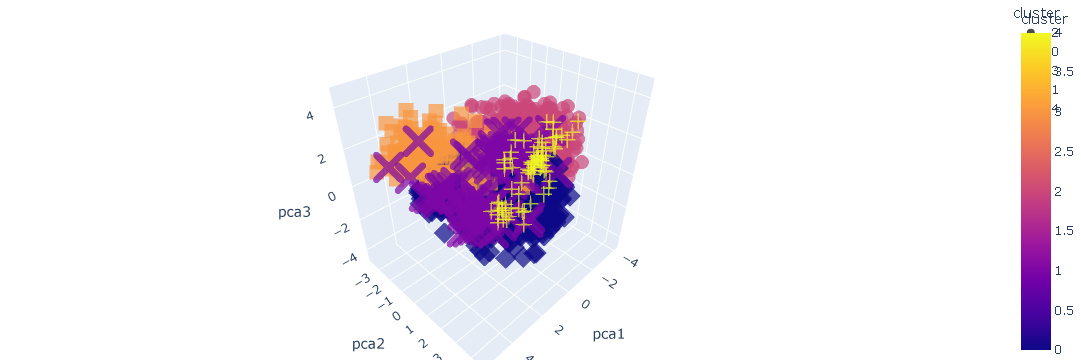

In [265]:
fig = px.scatter_3d(pca_df, x='pca1', y='pca2', z='pca3', 
                    color='cluster', symbol='cluster', size_max=18, opacity=0.7)
fig.update_layout(margin = dict(l = 0, r = 0, b = 0, t = 0))

Some clusters overlap each other.

# 5: APPLYING AUTOENCODERS

In [266]:
sales_df.shape

(2823, 38)

In [267]:
# It was said:
input_df = Input(shape = (38,))
x = Dense(50, activation = 'relu')(input_df)
x = Dense(500, activation = 'relu', kernel_initializer = 'glorot_uniform')(x)
x = Dense(500, activation = 'relu', kernel_initializer = 'glorot_uniform')(x)
x = Dense(2000, activation = 'relu', kernel_initializer = 'glorot_uniform')(x)
encoded = Dense(8, activation = 'relu', kernel_initializer = 'glorot_uniform')(x)
x = Dense(2000, activation = 'relu', kernel_initializer = 'glorot_uniform')(encoded)
x = Dense(500, activation = 'relu', kernel_initializer = 'glorot_uniform')(x)
decoded = Dense(38, kernel_initializer = 'glorot_uniform')(x)
autoencoder = Model(input_df, decoded)
encoder = Model(input_df, encoded)
autoencoder.compile(optimizer = 'adam', loss='mean_squared_error')
# was said.

In [ ]:
# It was said:
autoencoder.fit(sales_df, sales_df, batch_size=128, epochs=500, verbose=3)
# was said.

In [ ]:
# It was said:
encoded_df = autoencoder.predict(sales_df_scaled)
# was said.

In [ ]:
# It was said:
wcss = []
for i in range(1,15):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(encoded_df)
    wcss.append(kmeans.inertia_)
plt.plot(wcss, marker='o', linestyle='--')
plt.title('The Elbow Method (Finding an optimal number of clusters)')
plt.xlabel('Number of CLusters')
plt.ylabel('WCSS')
plt.show()
# was said.

In [ ]:
# It was said:
kmeans = KMeans(3)
kmeans.fit(encoded_df)
labels = kmeans.labels_
y = kmeans.fit_predict(sales_df_scaled)
# was said.

In [ ]:
df_cluster_dr = pd.concat([sales_df, pd.DataFrame({'cluster':labels})], axis = 1)
df_cluster_dr.head()

In [ ]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [sales_df.columns])
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [sales_df.columns])
cluster_centers

In [ ]:
# Ploting a histogram based on clusters
for i in sales_df.columns[:8]:
  plt.figure(figsize = (30, 6))
  for j in range(3):
    plt.subplot(1, 3, j+1)
    cluster = df_cluster_dr[df_cluster_dr['cluster'] == j]
    cluster[i].hist()
    plt.title('{}    \nCluster - {} '.format(i,j))
  plt.show()

**OBSERVATIONS:**
* Cluster 0 - This group represents customers who buy items in high quantity(47), they usually buy items with high prices(99) and they bring-in more sales than other clusters, they are mostly buying through out the year, they usually buy products corresponding to product code 10-90 and they buy products with high mrsp(158).
* Cluster 1 - This group represents customers who buy items in average quantity(37), they tend to buy high price items(95), they bring-in average sales(4398), they are buying all around the year, they are most buyers of products corresponding to product code 0-10 and 90-100 and they buy products with high MSRP(115).
* Cluster 2 - This group represents customers who buy items in small quantity(30), they tend to buy low price items(69), they correspond to lowest total sale(2061), they are buying all around the year, they are most buyers of products corresponding to product code 0-20 and 100-110 and they buy products with low MSRP(77).

In [ ]:
# Reducing original data to 3 dimensions using PCA for visualizing clusters
pca = PCA(n_components = 3)
prin_comp = pca.fit_transform(sales_df_scaled)
pca_df = pd.DataFrame(data = prin_comp, columns = ['pca1', 'pca2', 'pca3'])
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster':labels})], axis = 1)
pca_df.head()

In [ ]:
# Visualizing clusters using 3D-Scatterplot
fig = px.scatter_3d(pca_df, x = 'pca1', y = 'pca2', z = 'pca3',
              color='cluster', symbol = 'cluster', size_max = 10, opacity = 0.7)
fig.update_layout(margin = dict(l = 0, r = 0, b = 0, t = 0))